_**Final Project**_
__A Losing Game:The Race to Save the Olympics__


***_By Adam Kaba and Juliette Oliver_***

The Olympics, a spectacle adored by those of every age around the world every two years. It seems that with every Olympic game new records are being broken and the limit of human strength and fortitude redefined, encouraging global participation and unification. While an event as cherished as this one would seemingly be held without question, the number of countries vying for this opportunity has dwindled down every year. This has led us to question the reason for this phenomenon, which Bloomberg post has described as an economic burden countries no longer want to shoulder. To dig deeper, our team has investigated the economic and social costs and impacts of the Olympic games in order to gain a more comprehensive view of the problem at hand. Here is the culmination of our research.


First, we will import all necessary packages that will allow us to perform functions to spatially visualize our data. Packages like this include Geopandas, Plotly, and Kepler.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as offline

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv('Cost_event_athlete.csv')

I have imported my CSV file into the Jupyter Notebook so that I will now have a database that I can work with. I will also use the .info button to show me a rough outline of my data. This will allow me to be able to see general information, such ad Dtype of data and Column names that I can use to go forward in my exploration.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Games                       25 non-null     object 
 1   Year                        25 non-null     int64  
 2   Country                     25 non-null     object 
 3   Type                        25 non-null     object 
 4   Cost per event, mio. USD    25 non-null     float64
 5   Cost per athlete, mio. USD  25 non-null     float64
 6   event,                      0 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


We are using .head in order to see the first 10 entries in our data which will give us a better understanding of the data we are working with.


In [4]:
df.head(10)

Games  Year        Country    Type  Cost per event, mio. USD  \
0        Tokyo  1964          Japan  Summer                       1.7   
1       Munich  1972        Germany  Summer                       5.2   
2     Montreal  1976         Canada  Summer                      30.8   
3       Moscow  1980   Soviet Union  Summer                      31.2   
4  Los Angeles  1984  United States  Summer                       3.3   
5    Barcelona  1992          Spain  Summer                      37.7   
6      Atlanta  1996  United States  Summer                      15.3   
7       Sydney  2000      Australia  Summer                      16.8   
8       Athens  2004         Greece  Summer                       9.8   
9      Beijing  2008          China  Summer                      22.5   

   Cost per athlete, mio. USD  event,  
0                         0.1     NaN  
1                         0.1     NaN  
2                         1.0     NaN  
3                         1.2     NaN  
4                         0.1     NaN  
5                         1.0     NaN  
6                         0.4     NaN  
7                         0.5     NaN  
8                         0.3     NaN  
9                         0.6     NaN

Action: Replacing Soviet Union- with Russia.
Result: Since the Soviet Union no longer exist, and the games took place in Moscow, we will just change the location to Russia to have more organized and consistant data.

In [5]:
df = df.replace('Soviet Union', 'Russia')
df

Games  Year         Country    Type  Cost per event, mio. USD  \
0            Tokyo  1964           Japan  Summer                       1.7   
1           Munich  1972         Germany  Summer                       5.2   
2         Montreal  1976          Canada  Summer                      30.8   
3           Moscow  1980          Russia  Summer                      31.2   
4      Los Angeles  1984   United States  Summer                       3.3   
5        Barcelona  1992           Spain  Summer                      37.7   
6          Atlanta  1996   United States  Summer                      15.3   
7           Sydney  2000       Australia  Summer                      16.8   
8           Athens  2004          Greece  Summer                       9.8   
9          Beijing  2008           China  Summer                      22.5   
10          London  2012  United Kingdom  Summer                      49.5   
11             Rio  2016          Brazil  Summer                      14.9   
12       Innsbruck  1964         Austria  Winter                       0.6   
13        Grenoble  1968          France  Winter                      25.4   
14         Sapporo  1972           Japan  Winter                       3.4   
15       Innsbruck  1976         Austria  Winter                       3.2   
16     Lake Placid  1980   United States  Winter                      11.5   
17         Calgary  1988          Canada  Winter                      24.1   
18     Albertville  1992          France  Winter                      35.0   
19     Lillehammer  1994          Norway  Winter                      36.5   
20          Nagano  1998           Japan  Winter                      32.7   
21  Salt Lake City  2002   United States  Winter                      32.3   
22          Torino  2006           Italy  Winter                      52.0   
23       Vancouver  2010          Canada  Winter                      29.5   
24           Sochi  2014          Russia  Winter                     223.4   

    Cost per athlete, mio. USD  event,  
0                         0.10     NaN  
1                         0.10     NaN  
2                         1.00     NaN  
3                         1.20     NaN  
4                         0.10     NaN  
5                         1.00     NaN  
6                         0.40     NaN  
7                         0.50     NaN  
8                         0.30     NaN  
9                         0.60     NaN  
10                        1.40     NaN  
11                        0.40     NaN  
12                        0.02     NaN  
13                        0.80     NaN  
14                        0.10     NaN  
15                        0.10     NaN  
16                        0.40     NaN  
17                        0.80     NaN  
18                        1.10     NaN  
19                        1.30     NaN  
20                        1.00     NaN  
21                        1.10     NaN  
22                        1.70     NaN  
23                        1.00     NaN  
24                        7.90     NaN

Action: Now we will analyze the cost per event and per athlete of both summer and winter Olympic games.
Result: This will allow us to look for interesting trends in the data to see if we can find a correlation.

Text(0.5, 1.0, 'Cost per event and per athlete Winter Olympics')

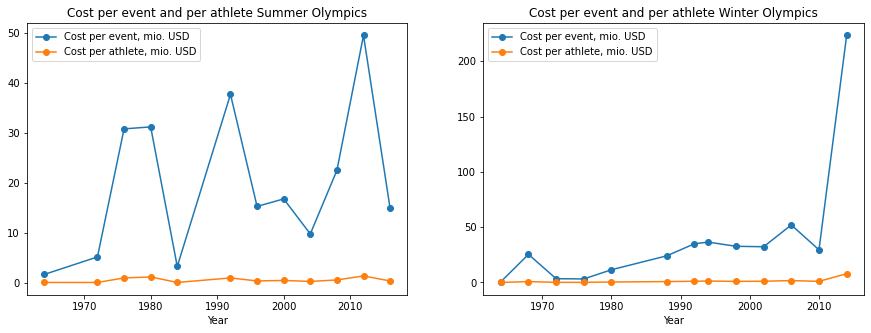

In [6]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
df[df["Type"] == "Summer"].plot(x="Year", y=["Cost per event, mio. USD", "Cost per athlete, mio. USD"], ax = ax[0],marker='o')
ax[0].set(title = "Cost per event and per athlete Summer Olympics")

df[df["Type"] == "Winter"].plot(x="Year", y=["Cost per event, mio. USD", "Cost per athlete, mio. USD"], ax = ax[1],marker='o')
plt.title('Cost per event and per athlete Winter Olympics')

Findings: By looking at the graphs, it is interesting to see the general growth in both cost per event and per athlete at the games throughout history. This tells us that the games are getting more expensive to host every year, although what differs is that generally summer Olympics have fluctuated, but still with an upward trend, while the winter Olympics have mostly risen before skyrocketing as of recent. This could possibly mean a general difference in cost to host a summer Olympic vs a Winter Olympic, but shows us that in general both games are becoming more and more expensive to host. This could mean bad news for less developed countries who wish to host the games, as the cost could be too high if they continue to rise. In addition, this is a problem for even the most affluent countries, because as costs rise it still means a larger economic undertaking for these countries which may limit their desire to host the Olympics. Overall this means less countries may be able or willing to host the Olympics.

Next we will install pycountry and matplotlib.
Result: We will be able to assign 3 letter Alpha codes to the countries in our dataset, allowing us visually spatialize our data later.

In [7]:
%matplotlib inline


In [8]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pycountry

Action: Creating a new column for the 3 letter country code.
Result: This will give the 3 alpha code a place to go, which will allow us to use that column to spatialize our data,

In [10]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

Action and Result: I am replacing the "None" with RUS so that my data will have the appropriate 3 letter alpha code for the country which will allow it to appear on my map

In [11]:
df['CODE']=alpha3code(df.Country)
df = df.replace('None', 'RUS')
df.head(10)

Games  Year        Country    Type  Cost per event, mio. USD  \
0        Tokyo  1964          Japan  Summer                       1.7   
1       Munich  1972        Germany  Summer                       5.2   
2     Montreal  1976         Canada  Summer                      30.8   
3       Moscow  1980         Russia  Summer                      31.2   
4  Los Angeles  1984  United States  Summer                       3.3   
5    Barcelona  1992          Spain  Summer                      37.7   
6      Atlanta  1996  United States  Summer                      15.3   
7       Sydney  2000      Australia  Summer                      16.8   
8       Athens  2004         Greece  Summer                       9.8   
9      Beijing  2008          China  Summer                      22.5   

   Cost per athlete, mio. USD  event, CODE  
0                         0.1     NaN  JPN  
1                         0.1     NaN  DEU  
2                         1.0     NaN  CAN  
3                         1.2     NaN  RUS  
4                         0.1     NaN  USA  
5                         1.0     NaN  ESP  
6                         0.4     NaN  USA  
7                         0.5     NaN  AUS  
8                         0.3     NaN  GRC  
9                         0.6     NaN  CHN

Action: We will make geopandas read a file path "Naturalearth" and find the lattitudes and longitudes of the alpha codes from a github account.
Result: By making geopandas read naturalearth and merge with the github account, this will allow the latitude and longitude information in the Github account to be synched with our 3 letter alphacodes. Those 3 letter alphacodes will then be able to be mapped thanks to their correlation with the information in the github account.

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [13]:
merge=pd.merge(world,df,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Cost per event, mio. USD', ascending=False).reset_index()

Action and Result: We will convert our map to the mercator projection which will allow us to place a basemap on our map. The basemap will allow us to gain a better understanding of the countries who have hosted the olympics comapred to the countries that have not.

In [14]:
gdf_web_mercator = merge.to_crs(epsg=3857)

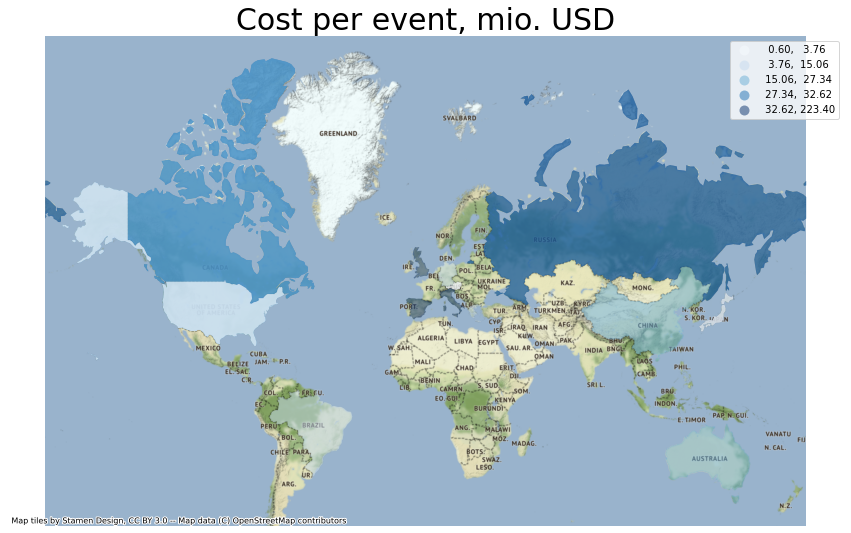

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator.plot('Cost per event, mio. USD',ax=ax, alpha=0.5,scheme="quantiles",legend=True,cmap='Blues')

ax.axis('off')
ax.set_title('Cost per event, mio. USD',fontsize=30)
ctx.add_basemap(ax)


plt.show()

Analysis: Here, thanks to our map, we can clearly see the countries who have hosted the Olympics and the shading that corresponds to the cost per event of each game in each respective host country. Some interesting findings are that the majority of the games have been held in Northern countries, and places we generally consider "Highly Developed". We can also see clearly that many countries pay upwards in the millions of dollars to hold a single event. This is interesting to our cause, because it brings up the question "Why are only "highly developed" countries hosting the Olympics?". Well, in conjunction with the visualizations shown previously, we know that the cost of the Olympics  has been rising steadily. These visualizations demonstrate to us that the cost to host the Olympic is quite exorbident and thus could explain why underdeveloped countries have not held the Olympics due to the high economic burden. This ultimately spells out bad news for the future of the Olympics, because if the costs continue to rise, only "highly developed countries' will be able to continue to host, and by then they will be unlikely be host the enormours economic burden that comes with the. games as trends suggest.


Now that we've been able to see the clear economic situation of countries who have hosted the Olympics, lets take a closer look at the representation of the Olympics and see if they too are largely from highly developed countries.

First we will import the necissary datasets that we will use to begin analyzing our data. These datasets include plot points of populated places around the world and information about summer Olympic competitors from the years 1970 to 2007.

In [16]:
cities = gpd.read_file("ne_50m_populated_places.geojson")
ss = gpd.read_file("Summer_Sports.csv")
ss.head()



City  Year     Sport Discipline           Event  \
0  Montreal  1976  Aquatics     Diving  3m springboard   
1  Montreal  1976  Aquatics     Diving  3m springboard   
2  Montreal  1976  Aquatics     Diving  3m springboard   
3  Montreal  1976  Aquatics     Diving  3m springboard   
4  Montreal  1976  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0     b'K\xd6HLER, Christa'  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal geometry  
0  Silver     None  
1  Bronze     None  
2    Gold     None  
3  Silver     None  
4  Bronze     None

We will drop "geometry' because it is NA. Next we will replace the column name of "Country_Code" to "CODE" so that it will allign with another column we will import later from a different dataset later in our data exploration.

In [17]:
ss = ss.drop(columns = 'geometry')

In [18]:
ss.rename(columns={'Country_Code':'CODE'}, inplace=True)

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

Now, we will connect our data to a github account that has the latitude and longitude of all 3 letter alpha codes for countries. This will allow the 3 letter alpha codes asociated with our countries to be assigned relevent cordinates which will allow us to map it latter in our data exploration.

In [20]:
 merge=pd.merge(world,ss,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').reset_index()

We are doing a similer process of renaming cities with cordinate points so that we will be able to mark them on maps.

In [21]:
cities =cities.rename(columns = {"NAME": "Destination"})

In [22]:
merge =merge.rename(columns = {"City": "Destination"})

In [23]:
cities =cities.rename(columns = {"LATITUDE": "Destination_lat"})

In [24]:
cities =cities.rename(columns = {"LONGITUDE": "Destination_long"})

In [25]:
cities = cities[['Destination','Destination_lat','Destination_long']]

In [26]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Destination       1249 non-null   object 
 1   Destination_lat   1249 non-null   float64
 2   Destination_long  1249 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.4+ KB


Because our dataset is so large, we have decided to filter our data by gender in order to both run our program with more ease and to investigate specifically the Olympic paths of women.

In [27]:
merge = merge[merge["Gender"] == "Women"]

In [28]:
merge=merge.merge(cities, on = "Destination")

In [29]:
merge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4818 entries, 0 to 4817
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             4818 non-null   int64   
 1   pop_est           4818 non-null   int64   
 2   continent         4818 non-null   object  
 3   name              4818 non-null   object  
 4   CODE              4818 non-null   object  
 5   gdp_md_est        4818 non-null   float64 
 6   geometry          4818 non-null   geometry
 7   Destination       4818 non-null   object  
 8   Year              4818 non-null   object  
 9   Sport             4818 non-null   object  
 10  Discipline        4818 non-null   object  
 11  Event             4818 non-null   object  
 12  Athlete           4818 non-null   object  
 13  Gender            4818 non-null   object  
 14  Country           4818 non-null   object  
 15  Event_gender      4818 non-null   object  
 16  Medal           

We are importing Kerler because it provides a unqiue ability to spatially visualize our data efficiently and with aestheticallty pleasing map layouts

In [30]:
from keplergl import KeplerGl

In [31]:
#Create a basemap 
map = KeplerGl(height=600, width=800)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [32]:
map.add_data(data=merge)

In [33]:
map



KeplerGl(data={'unnamed': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,…

Here is our map depicting all of the countries that sent women to the Olympics in 2000. The red marks their send off and the green marks their destination (Beijing) As we can see from this map, a large majority of countries sent female athletes to the games this year. What is most notable about this visualization though, is the lack of female representation from countries in Africa and the Middle East. From Africa, there are only 4 countries that sent female athletes in 2008. This leads us to beg the question "Why were women disproportionately underrepresented from countries within Africa and the Middle East"? From our previous research about the economic impacts of the Olympics, we can already hypothesize that economic cost may play a role in womens abilities to go to the Olympics from these countries. Because participation in the Olympics includes so much more than just a plane ticket there, including years of training, private coaching, and Olympic equipment, we can easily understand the other enormours costs that come with preparing and sending athletes to the Olympics could play a role. In addition, we also acknowledge the varying cultural standards in these parts of the world regarding womens limited participation on sports which may influence these numbers. Ultimately we still find it interesting that again, places of the world considered to be the least developed have the least represenation among women in the Olympic in 2008 (and is consitant with prvious years). What this tells us is that there is a elitiest element to being able to go to the Olympics. Because the costs of the games continue to rise every year, we can infer that this is hard for countries to handle, and is leading to the decrease in the number of countries wanting to host the Olympiucs. This is further revealed by the limited number of female rpresentatives from the most underdeveloped parts of the world who may face the economic burden of attempting to train Olympic ahtletes and unable to burden the costs. If the Olympics are to truly continue, and not just for the wealthiest of countries, measures to limit ballooning costs are needed.

While we support the growth of representation of all genders and nationalities in the Olympics, we are curious to analzye the affect of increased events and participants has on the games.

Action: Importing data. The first dataset has information about the growth of womens events and competitors in the olympics. The second is data we already saw early about cost per event.

In [34]:
wp = pd.read_csv('womens_part.csv')
df3= pd.read_csv('Cost_event_athlete.csv')

Text(0.5, 1.0, 'Cost per event and per athlete Winter Olympics')

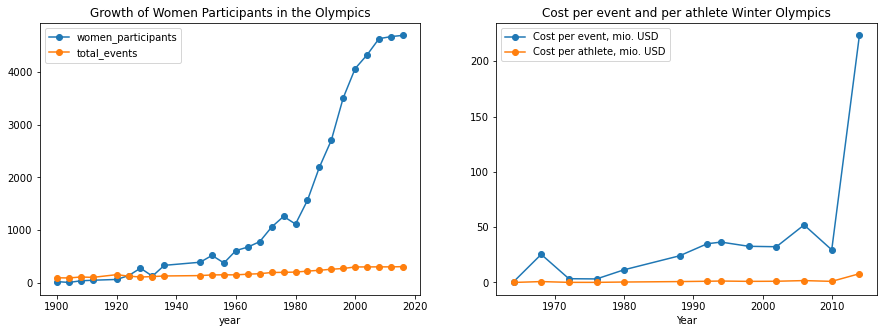

In [35]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
wp.plot(x="year", y=["women_participants","total_events"], ax = ax[0],marker='o')
ax[0].set(title = "Growth of Women Participants in the Olympics")

df3[df3["Type"] == "Winter"].plot(x="Year", y=["Cost per event, mio. USD","Cost per athlete, mio. USD"], ax = ax[1],marker='o')
plt.title('Cost per event and per athlete Winter Olympics')

Here, we can see the huge growth of womens total events and women participants in the Olympics, as well as the rise in cost per event and per athlete in the Winter Olympics. What is interesting about looking at these charts side by side is that we can see how both graphs rise positively. This makes us wonder if the rise in the number of events and participants, mostly due to allowing a large number of new participants (women) into the Olympics has also drastically risen the price of the Olympics. If the rise in events and participants affects the price, this means that the future of the Olympics may lay in limiting the growth of events, as more events may mean an even greater economic burden which excludes many countries around the world from hosting. This provides a difficult situation, as the Olympics should attempt to be a open even for all genders and nationalities, but we do recognize that atttempting to create too many events may rise the costs and then inherently bar less developed countries from being able to compete or host the Olympics. Ultimately Olympics committees must commit to analyzing the largest contributers to costs in order to lower rising Olympics costs and still increase represenation to create a more inclusive Olympic enviroment.

While we can see the possible negative side effect of the growing number of events (possibly due to the growth of womens events), lets look at the growth in total represenation of women in the games throughout the years.


We are now installing Pywaffle so we can make waffle graphs. These graphs will allow us to visualize and show our data in interesting and compelling ways. (Just for you Yoh <3)

In [36]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [37]:
from pywaffle import Waffle

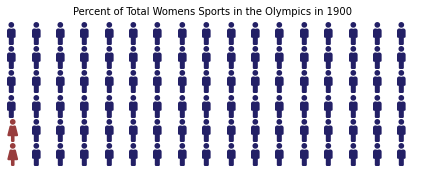

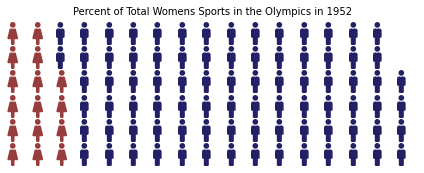

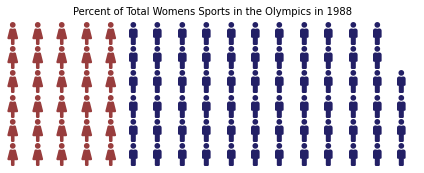

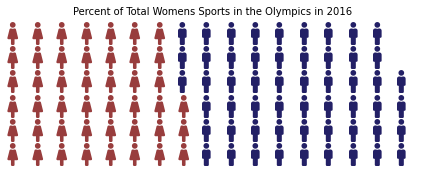

In [38]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[2,100],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 1900',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[16, 84],
    colors=("#983D3D","#232066"),
    icons=('female','male'))
plt.title('Percent of Total Womens Sports in the Olympics in 1952',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[30, 70],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 1988',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[45, 55],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 2016',fontsize=10)
plt.show()

Here is the gender breakdown of the total number of women who competed in the Olympics compared to men from 1900 to 2016. As we can see, at the begining of the 20th century, only 2% of participants in the Olympics were women, but as the years have gone by, that number has grown to 16%, 30%, and 45% respectively. What this tells us is that as time has passed, both more women have wanted to participate and have been allowed to do so by the Olympic committee. While we know that a increase in events and participants ultimately raises the price of the Olympics, we also wonder what social impact womens representation in sports has helped cause. We can already see that in 100 years, attitudes torwards the acceptance of female athletes has become more positive due to their allowance to play in the Olympics. Although it is hard to tell now, we still hypothesize that an increased presence of female athletes on a global stage could possibly influence other young women to persue sports, and ultimately applaud the increased representation of women in sports. On a world stage, this is especially important, and we believe it would be beneficial to society to provide a global stage for both men and women to positively represent their countries as idols everyehere.

Next we'll take a look at how womens attendance has changed for each country over the course of the games. I'm going to import a dataset that has a list of every athlete to compete in the games. However, since this list is very big, we'll be getting what we need from it and removing it.

In [39]:
olympics = pd.merge(pd.read_csv("athlete_events.csv"),pd.read_csv("noc_regions.csv"), on = "NOC")
print(olympics.shape)
olympics.head()

(270767, 17)


ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Middleweight   NaN  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman   NaN  China   NaN  
4     Swimming Women's 200 metres Freestyle   NaN  China   NaN

In [40]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


There's a lot of data here, but for now we're only interested in how womens attendance of the olympics in each country has changed. To do this, we'll be grouping by region and year, and using value counts. Doing this we get the attendance of each sex for each olympics, separated by country.

In [41]:
df = olympics.groupby(["region","Year"])['Sex'].value_counts().to_frame(name = "count").reset_index()
df = df.rename(columns = {"region": "country"})
del olympics
df

country  Year Sex  count
0     Afghanistan  1936   M     16
1     Afghanistan  1948   M     25
2     Afghanistan  1956   M     12
3     Afghanistan  1960   M     16
4     Afghanistan  1964   M      8
...           ...   ...  ..    ...
5658     Zimbabwe  2012   F      5
5659     Zimbabwe  2012   M      4
5660     Zimbabwe  2014   M      2
5661     Zimbabwe  2016   F     22
5662     Zimbabwe  2016   M      9

[5663 rows x 4 columns]

Just like that the olympics data has served it's purpose.
We're going to make an interactive chart to explore female athlete data year by year. The function we use maps countries by searching for the country name, so we'll be cleaning up the country names.

In [42]:
df = df.replace('USA', 'United States of America')
df = df.replace('UK', 'United Kingdom')
df = df.replace('Soviet Union', "Russia")

The map is going to be segmented on year, which can be controlled via a slider. Here we set the slider and the data up.

In [43]:
#Create data to populate each section of slider
data_slider = []
for year in sorted(df["Year"].unique()):
    df_segmented =  df[(df['Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented.country,
                        z=df_segmented['count'].astype(float),
                        locationmode='country names',
                        colorscale = "greens",)
                        #colorbar= {'title':'# Count'})

    data_slider.append(data_each_yr)

steps = []

#Create slider
for i in range(len(data_slider)):
    if i == 0:
        previous = 1900
        delta = 0
    else:
        previous = sorted(df["Year"].unique())[i-1]
        delta = sorted(df["Year"].unique())[i]- previous
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(delta + previous))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(geo=dict(scope='world',
                       showcountries = True,
                       projection={'type': 'equirectangular'}),
              sliders=sliders)





<ipython-input-43-d8c6663bb181>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
fig = dict(data=data_slider, layout=layout)
plotly.offline.iplot(fig, show_link = True)

This graph shows how many women athletes every country sent to each olympic games. Some interesting things to note are that the US actually sent 9 women to the olympics in the 1900's. Then after that there was a dry period for some decades. In the past couple decades, the countries that sent the most women were the USA, Canada, Russia, and China. We hypothesize that it's not a coincidence that these are also the richest countries in the world as the Olympics pose a enormours economic burden for host countries and athletes alike. This would explain the large lack of represenation of women from less affluent parts of the world, as these countries may struggle to fundraise the capital needed to send athletes.
Despite this, all these graphs have demonstrated that the Olympics have been both a great catalyst to increasing womens presence on the global stage of sports and a economic burden. This threatens the existance of the olympics, because even with a desire from young women and men to compete in the games, if the games continue to grow in price, we know that they will not be able to continue due to lack of countries willing to host them. Ultimately, our data suggests that changes should be made to stop the rising prices of the Olympics and its future end. 

While we have an idea of the economic impact and role as potential catalyst of gender rpreenation in sports, we want to gain a better understanding of societal attitudes torwards the games. Twitter is one of the largest forms of social media in the world, so it seems like the perfect place to potentially pinpoint some social impacts of the olympics. This is what we will be trying to do.
First we will import some necissary libraries that will help us gather twitter data.

In [45]:
import osmnx as ox
# to get tweets
import tweepy as tw

# for sentiment analysis
from textblob import TextBlob
import re

# word clouds
from wordcloud import WordCloud, STOPWORDS

Next is to set up tweepy to read in tweets

In [46]:
consumer_key= 'zuTFZBboQvly56KmotcIG4wm1'
consumer_secret= 'XNfbpZcOP1R8DmkjgTJdCiuh5Rud6T7alzvVO1Epzf4AG0FOEF'
access_token= '3183518040-4FjfAIfd7zwZYS4qgX3cEENKnSJJQgZ9lpH6NoO'
access_token_secret= 'koAYo16Z08Pg1thp3yeim3uadbPzhKWcvIchWOdCFLhrN'

In [47]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


Since our topic is on the olympics, first we'll get a feel for the social landscape without any other specifics

In [48]:
# search query
searchterm = 'olympics'

# filter out retweets (optional of course)
q = searchterm + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

In [49]:
json_data = [tweet._json for tweet in tweets]
df = pd.json_normalize(json_data)
df.head()

created_at                   id               id_str  \
0  Wed Mar 17 09:48:20 +0000 2021  1372122620641091585  1372122620641091585   
1  Wed Mar 17 09:48:16 +0000 2021  1372122604518182916  1372122604518182916   
2  Wed Mar 17 09:48:07 +0000 2021  1372122565284564995  1372122565284564995   
3  Wed Mar 17 09:48:01 +0000 2021  1372122543394541568  1372122543394541568   
4  Wed Mar 17 09:47:30 +0000 2021  1372122410925883393  1372122410925883393   

                                           full_text  truncated  \
0  #azerbaycan #turkiye #yenimesaj_az #turk_az #s...      False   
1                            https://t.co/2rQxzyHukI      False   
2  @BrianDavidBerry @jt_mag_os Can't cancel the O...      False   
3  @sahra087 @Zzztront @yasrofl @lunehsl @Fayriah...      False   
4  #azerbaycan #turkiye #yenimesaj_az #turk_az #s...      False   

  display_text_range                                             source  \
0           [0, 110]  <a href="https://mobile.twitter.com" rel="nofo...   
1            [0, 23]  <a href="http://www.powerapps.com" rel="nofoll...   
2           [28, 79]  <a href="http://twitter.com/download/android" ...   
3          [83, 190]  <a href="https://mobile.twitter.com" rel="nofo...   
4           [0, 110]  <a href="https://mobile.twitter.com" rel="nofo...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                    NaN                      None                  NaN  ...   
1                    NaN                      None                  NaN  ...   
2           1.372122e+18       1372122281019772931         2.996174e+08  ...   
3           1.372122e+18       1372122200657039360         1.092485e+18  ...   
4                    NaN                      None                  NaN  ...   

  quoted_status.retweet_count quoted_status.favorite_count  \
0                         NaN                          NaN   
1                         NaN                          NaN   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                         NaN                          NaN   

  quoted_status.favorited quoted_status.retweeted  quoted_status.lang  \
0                     NaN                     NaN                 NaN   
1                     NaN                     NaN                 NaN   
2                     NaN                     NaN                 NaN   
3                     NaN                     NaN                 NaN   
4                     NaN                     NaN                 NaN   

  quoted_status.possibly_sensitive  quoted_status.entities.media  \
0                              NaN                           NaN   
1                              NaN                           NaN   
2                              NaN                           NaN   
3                              NaN                           NaN   
4                              NaN                           NaN   

   quoted_status.extended_entities.media  quoted_status.quoted_status_id  \
0                                    NaN                             NaN   
1                                    NaN                             NaN   
2                                    NaN                             NaN   
3                                    NaN                             NaN   
4                                    NaN                             NaN   

   quoted_status.quoted_status_id_str  
0                                 NaN  
1                                 NaN  
2                                 NaN  
3                                 NaN  
4                                 NaN  

[5 rows x 162 columns]

Theres a lot of columns so we'll just select the useful ones.

In [50]:
df = df[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]

In [51]:
pd.set_option('display.max_colwidth', None)
df.head(10)

created_at  \
0  Wed Mar 17 09:48:20 +0000 2021   
1  Wed Mar 17 09:48:16 +0000 2021   
2  Wed Mar 17 09:48:07 +0000 2021   
3  Wed Mar 17 09:48:01 +0000 2021   
4  Wed Mar 17 09:47:30 +0000 2021   
5  Wed Mar 17 09:47:16 +0000 2021   
6  Wed Mar 17 09:47:01 +0000 2021   
7  Wed Mar 17 09:46:39 +0000 2021   
8  Wed Mar 17 09:46:31 +0000 2021   
9  Wed Mar 17 09:46:26 +0000 2021   

                                                                                                                                                                                                                                                                                                           full_text  \
0                                                                                                                                                                                                     #azerbaycan #turkiye #yenimesaj_az #turk_az #sport #spor #futbol #olympics #UEFA #affa https://t.co/6ek8qdnPiN   
1                                                                                                                                                                                                                                                                                            https://t.co/2rQxzyHukI   
2                                                                                                                                                                                                                                    @BrianDavidBerry @jt_mag_os Can't cancel the Olympics without more dead people.   
3                                                                                                                     @sahra087 @Zzztront @yasrofl @lunehsl @Fayriah @terras1 @nicsbbyyy @yalljustbelyin is this the oppression olympics? why tf are you comparing two groups of people from different places weirdo   
4                                                                                                                                                                                                     #azerbaycan #turkiye #yenimesaj_az #turk_az #sport #spor #futbol #olympics #UEFA #affa https://t.co/VPjzghl3NT   
5                                                                                                                                                                                              Ghana Team at the 1964 Olympics games held in Tokyo. \nRich Kente on display 🇬🇭\n#GhanaBosome https://t.co/DlO6UO9cI2   
6  Indian long jumper Sreeshankar Murali qualified for Tokyo Olympics on Tuesday. \n\nTaking part in the 24th Senior Federation Cup, Sreeshankar jumped 8.26m to create a national record and earned himself a berth at the mega event in Japan. The qualifying mark for the Games is 8.22m. https://t.co/vzmgPPRQYO   
7                                                                                                                                                             Iga Świątek has confirmed she will not play the Billie Jean King Cup for Poland this year but she does hope to represent her country at the #Olympics.   
8                                                                                                                                                                                                                                                                        @WofahKay1 @giftyy_x No Great Olympics cap?   
9                                                                                                                        @rorymcevoy It's amazing technology. I first saw it at the opening of the Beijing Olympics but search up drone dancing on YouTube and there's a rake of videos. \n\nhttps://t.co/NjNA9m0i9e   

  user.screen_name   geo coordinates  retweet_count  favorite_count  
0         GDemir61  None        None              0               0  
1   Brought_to_You  None        None      

From just 10 tweets, we can see that some of the rhetoric surrounding the Olympics is varied in meaning. We see both positive sentiment about the games and one or two tweets with a different meaning of "olympics" than we are concerend with. (It seems that "Olympics" is a common word used to describe someone being the most of something, such as the "oppresion" in this instance... this is obviously very different from our research).

Cleaning the text

In [52]:
def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [53]:
df['clean_text'] = ''

In [54]:
for i, row in df.iterrows():
    clean = clean_tweet(row.full_text)
    df.at[i,'clean_text'] = clean
    

In [55]:
allwords =  ' '.join(df['clean_text'])

Added some stopwords that are used a lot in the tweets, but dont really tell us much.

In [56]:
stop_words = [searchterm,'year','will','game','games', 'olympic','Im'] + list(STOPWORDS)

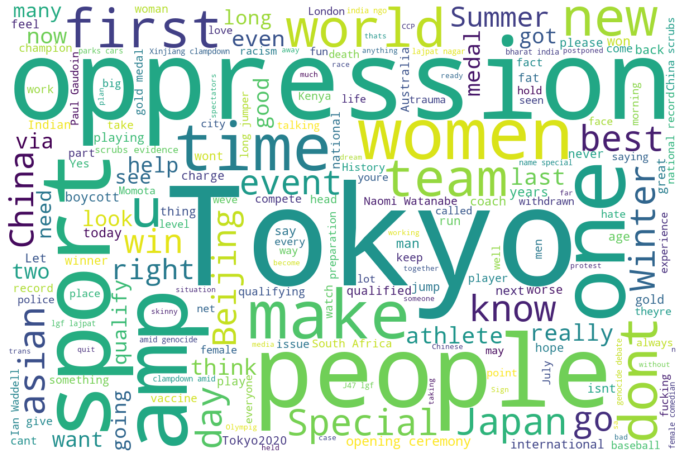

In [57]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Here is our first word cloud frm tweets relating tot he Olympics globally. What sticks out to us are the words "Tokyo" and "China".. From words like "Tokyo", we see that many people are talking about the future prospects of the Olympics (which is currently up in the air due to Covid). Although the games are some time away, the current buzz around the Tokyo Olympics shows us that people are indeed exciting or at the least intrigued about the games. Our next word, "China", is interesting, since this years games are supposed to be held in Japan. A few looks at the tweets has shown us that the current dialogue about the games shows that people are talking about Chinas participation while a very serious situation regarding Uigher muslims unfolds in their country. This mix of political talk and the Olympic demonstrates the almost diplomatic mission of the Olympics, that people do not merely see the games as seperate to the Political sphere and its doings. This shows that people see these two missions as related, and that blind acceptance of the situation unfolding in China would be a large mistep politically, (or for some stratig). In or opinion, this demonstrates the need for the Olympics as a unifying factor. If countries care about the ongoing actions of countries and wish to threaten their barring of participation in the Olympics, it demonstrates the importance of the games on a global stage. We believe that because of this, the games should continue on in order to continue uniting nations together as they do. 

In [58]:
df.sort_values("favorite_count",ascending = False)['clean_text'][1:5]

226    Momota Kento is feeling nervous ahead of his first international tournament in 14 monthsFind out how he has rediscovered his joy in badminton after a crash last year in Malaysiakento Laureus21
403                                                                    On 12 November 2019 Teboho Mokoena helped South Africa beat Cote dIvoire 10 in the TOTAL U23 AFCON on their quest to qualify for
475                                Not forgetting how the SOUTH AFRICAN CULINARY TEAN IS MAINLY WHITE TEAM MEMBERS and how they took Sifiso Chiziane to the CULINARY OLYMPICS 2020 to go was the DISHES
470               Id like to know at what stage his 4A is If he doesnt attempt it here he wont attempt it at the Olympics Hell go with the arsenal of jumps he has already ShoichiroTsuzuki paraphrased
Name: clean_text, dtype: object

In [59]:
tweets = tw.Cursor(api.search,
                   q=q,
                   geocode='51.51753,-0.11214,50km', 
                   tweet_mode='extended').items(max_tweets)

In [60]:
json_data = [tweet._json for tweet in tweets]
df2 = pd.json_normalize(json_data)

Extract the same variables

In [61]:
df2 = df2[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]
pd.set_option('display.max_colwidth', None)
df2.head(10)

created_at  \
0  Wed Mar 17 09:38:29 +0000 2021   
1  Wed Mar 17 09:27:22 +0000 2021   
2  Wed Mar 17 08:42:29 +0000 2021   
3  Wed Mar 17 08:41:30 +0000 2021   
4  Wed Mar 17 07:59:47 +0000 2021   
5  Wed Mar 17 07:13:07 +0000 2021   
6  Wed Mar 17 07:10:53 +0000 2021   
7  Wed Mar 17 07:05:53 +0000 2021   
8  Wed Mar 17 05:43:50 +0000 2021   
9  Wed Mar 17 03:57:21 +0000 2021   

                                                                                                                                                                                                                                                                                           full_text  \
0                                                                “‘I do think it knocked my confidence a bit, which we’ve been working on,” Laura Kenny says as she remembers breaking a shoulder and then an arm last year just before the Tokyo Olympics were postponed. ” https://t.co/UYpxQhc01d   
1       Laura &amp; Jason Kenny are disappointed their son won’t see them chase Olympic glory in Tokyo following plans to ban international travellers to Japan. Laura, who intends to race in 3 events, is preparing for next month's cycling selection-decider in Belgium\nhttps://t.co/LG3kxKXl6H   
2                                                                                                                                                                                                       Laura Kenny: 'I just thought I’ve had enough. I was in so much pain' https://t.co/etXi1QqjI6   
3                                                                                             Bit emotional at my vaccine today with all of the medics and volunteers. It felt like the London Olympics again. Thank you #NHSCovidVaccine #Science #LightattheEndoftheTunnel https://t.co/sFzwJCovdW   
4                                                                                                                                                                     Big interview … Laura Kenny: 'I just thought I’ve had enough. I was in so much pain.' By @donaldgmcrae https://t.co/5S9h94zeeS   
5                                                                                                Surfing! New @Olympics sport this year - if you surf &amp; would like to blog about your sport get in touch! 📸 Lucy Rodriguez #surfing #olympicsport #newsport #RideTheWave https://t.co/qY0Sdy4mn0   
6  @tracyjay67 @MingGao26 Interesting though that it was his first trip. 1987.\n\nIt was pretty unusual for Westerners who weren't diplomats to go during the Cold War, except for a few special events like the Olympics. Even those were partly boycotted.\n\nWe've seen why. It turns people bad.   
7                                                                                                                                                  @ChrispLOL @2_Wheeled_Wolf @IsSaddleThereIs We seriously need to improve our killing ratio if we hope to compete in the transport death Olympics.   
8                                                                                                                                                                                                                                                                   White Bloke at the Cone Olympics   
9                                                                                                                                                                                                                  @tengbiao This what happens after the #Olympics have left https://t.co/1FRTmxivjZ   

  user.screen_name  geo  coordinates  retweet_count  favorite_count  
0         The_MrsD  NaN          NaN              0               0  
1         Rob_Maul  NaN          NaN              0               0  
2  SickBikeRepairs  NaN          NaN              0               0  
3     Kathy_Rastle  NaN          NaN              1              32  
4   guar

Some interesting dialogue happening here. We see that a new sport- surfing- has been added to the games.We also see some dialogue about chasing "Olympic Glory" and yet a last tweet commenting on "This is what happens after the Olympics". While the tweet about the new sport and "chasing glory" show the positive sentiments about the Olympics, we see that there also exists otherwise. The negative sentiment is talking about the empty stadium and waste that comes as a price of hosting the Olympics. Not only do host countries spend millions on creating new stadiums, but then after the games they sit unused and rotting. This is something that adds to the reluctance of countries to host the Olympics. While we are excited about the positive sentiments of the games, we also recognize that the negative sentimetns address real issues of ballooning costs and waste that both hurt host countries, but dienchant and dissuade futur countries from hosting the games, ultimately meaning a possible end to the games. Luckily, the positive sentiments show support for the games, which shows that with some waste reduction and lowing of costs that the games could again become manageable.

In [62]:
df2['clean_text'] = ''
for i, row in df2.iterrows():
    clean = clean_tweet(row.full_text)
    df2.at[i,'clean_text'] = clean

Simillar stop words, however we excluded the location since its a search factor

In [63]:
allwords2 =  ' '.join(df2['clean_text'])
stop_words = [searchterm,'year','will','game','games', 'olympic','Im','olympics','London'] + list(STOPWORDS)

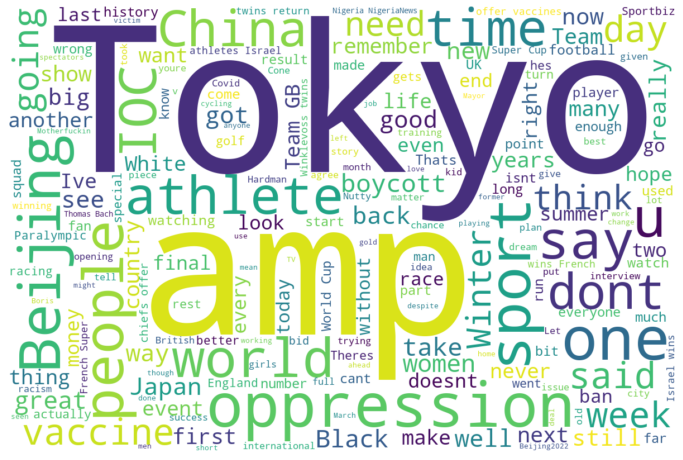

In [64]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords2)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This word cloud contains the same essence but actually differs a little. For one, the people in England seem to be thinking more in terms of the near future, with the olympic games last year being cancelled. AMP is widely used, and with a quick google search we were able to reveal that AMP stands for Athlete Marketing Program. This is a revelutionary program that allows athletes to ecpand marketing and sponsorship opportunities. Although we learned that this is a pilot progam in the U.S. this could be huge news for athletes globally to recieve funding to participate in the Olympics and help offest economic costs. This could be especially exciting as athletes from less affluent countries with talent could recieve sponsorship that would allow for increased representation in the Olympics, ultiamtely meaning a light at the end of the tunnel for the Olympics. Ultimately, we think it is interesting that these words are being talked about in Britan, but the existance and prevelance of AMP in their rhetoric could demonstrate a global interests in pilot programs like that in the U.S., which could lead to offsetting the economic burden of hosting and sending athletes to the Olympics globally.

In [65]:
df2.sort_values("retweet_count",ascending = False)['clean_text'][1:5]

394    So I was teaching Year 7 and I happened to refer to the 2012 olympics which took place in the same borough Then I said wait youre born in 2009 so would have been 3 and doubled over laughing Then one of them said my mum told me about it and that really took me out
210                            Johnsons 37 billion test and trace the most wasteful and inept public spending programme of all time a gold medal at the fiasco Olympics has made no discernible difference to the pandemic cost 1000 for each working age adult in the country
487                                                                                                                                                          I still cant believe Marc Gasol Pau Gasol Ricky Rubio and other NBA players did this during the Olympics in China
418                                                                                                                                                                                        

We then decided to search tweets surrounding the special olympics, as we were inspired earlier.

In [66]:
 #search query
searchterm = 'special olympics'

# filter out retweets (optional of course)
q = searchterm + " -filter:retweets"

# how many?
max_tweets = 500
 
# Creation of query method using parameters
tweets = tw.Cursor(api.search,
                   q=q, 
                   tweet_mode='extended').items(max_tweets)

In [67]:
json_data = [tweet._json for tweet in tweets]
df3 = pd.json_normalize(json_data)

Select the same columns

In [68]:
df3 = df3[['created_at','full_text','user.screen_name','geo','coordinates', 'retweet_count', 'favorite_count']]
pd.set_option('display.max_colwidth', None)
df3.head(10)

created_at  \
0  Wed Mar 17 09:45:34 +0000 2021   
1  Wed Mar 17 08:53:04 +0000 2021   
2  Wed Mar 17 08:30:19 +0000 2021   
3  Wed Mar 17 08:30:19 +0000 2021   
4  Wed Mar 17 08:26:32 +0000 2021   
5  Wed Mar 17 08:23:17 +0000 2021   
6  Wed Mar 17 08:07:59 +0000 2021   
7  Wed Mar 17 07:38:01 +0000 2021   
8  Wed Mar 17 07:33:26 +0000 2021   
9  Wed Mar 17 07:33:05 +0000 2021   

                                                                                                                                                                                                                                                                                                       full_text  \
0                      Today's @JournalPEI feature story on @SpecialOPEI athlete Christi-Joe (CJ) Snyders-Couchman, who has been named to @SpecialOCanada training squad for 2022 World Winter Games in Russia:\nhttps://t.co/XjC5gsC1fi\n@CSheehan78 @SportPEI @Matthew_McNally @BillySchurman @SpecialOlympics   
1                                                                                                                                                                 Special Olympics robotics competition offers pupils social lifeline in time of remote learning https://t.co/nGOoFMKhBx https://t.co/kiDkXZ7pLj   
2                                               This day two years ago Team Ireland were celebrating St Patrick's Day at the Special Olympics World Summer Games in Abu Dhabi\n\nTake a look back at the fun and games- it really makes us want to get back competing with our friends!\nhttps://t.co/M2BZkRaoDh   
3                                                                            This day two years ago Team Ireland were at the Special Olympics World Summer Games in Abu Dhabi\n\nTake a look back at the fun and games- it really makes us want to get back competing with our friends!\nhttps://t.co/9IKTlWSXJb   
4  Special Olympics South Africa And The Shudufhadzo Foundation Launch Partnership To Support Learners With Intellectual DisabilityJohannesburg, South Africa - Special Olympics South Africa and the Shudufhadzo Foundation this past weekend launched their\n\nhttps://t.co/mKaFvM9APg https://t.co/3rWxWPgL39   
5                                                                                                                                                                                                                     Maria Hijman coacht shorttrackers op Special Olympics Winter Games https://t.co/llPUuU0FZT   
6                                                                                                                                                                                                             Chicagoans get creative taking Special Olympics Polar Plunge virtual | GMA https://t.co/PqIlBNXhH6   
7                                                                                             SPECIAL OLYMPICS SOUTH AFRICA AND THE SHUDUFHADZO FOUNDATION LAUNCH PARTNERSHIP TO SUPPORT LEARNERS WITH INTELLECTUAL DISABILITY \n#specialOlympics #shundufhadzo\nhttps://t.co/lffw56alIc https://t.co/ARcjUZfrIq   
8                                                                                                                                                         #fitness Special Olympics Vermont and UVM support 'The Triple Combine Fitness Challenge' - Vermont Biz https://t.co/bNm2rj1U3s https://t.co/C3Zow8WhsX   
9                                                                                                       @The_Evil_Dr_R @ButtenshawGrant @Alex_Z_01 @svdate Clutching at straws should be an Olympic sport in the Special Olympics. These guy's could be contenders for a Tin Foil Medal! https://t.co/GkT3GYlx41   

  user.screen_name  geo  coordinates  retweet_count  favorite_count  
0    JpsportsJason  NaN          NaN              0               0  
1          UAENews  NaN          NaN              0               0  
2        SOIrela

Some interesting take aways from this is the largely positive rheotric. We see lines reminicing on the special Olympics in Abu Dhabi two years ago as well as lines expressing excitement about the advancements for the robotics part of the Special olympics for athletes. We are glad to see such positive influences come out of the games! It is positive sentiment like this leads us to believe in the true positive impact of the olympics and the importance that they continue on.

In [69]:
df3['clean_text'] = ''
for i, row in df3.iterrows():
    clean = clean_tweet(row.full_text)
    df3.at[i,'clean_text'] = clean

Same stopwords but tweaked a little

In [70]:
allwords3 =  ' '.join(df3['clean_text'])
stop_words = [searchterm,'year','will','game','games', 'olympic','Im','olympics','London','special','athlete','athletes'] + list(STOPWORDS)

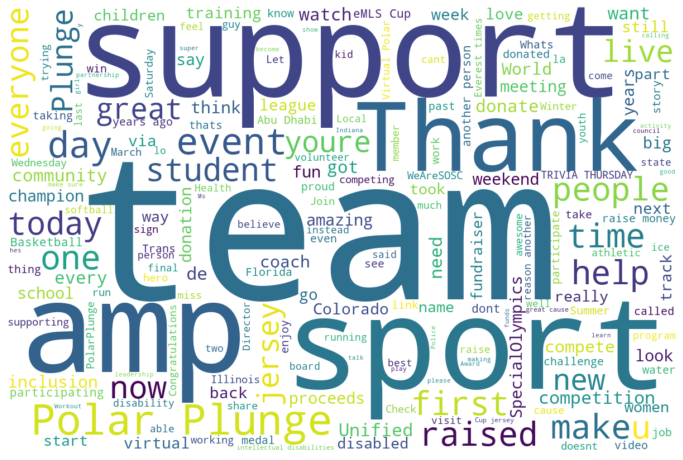

In [71]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(allwords3)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

This seems to be the most telling word cloud. For one, this definitely seems to have the biggest positive reception. Many of the words here are optimistic such as "support", "amazing" and "love". There appears to be a lot of tweets, of people trying to gather support for the special olympics. In addition, we see the new addition of the word "polar plunge".
The polar plunge is a well known fundraising event to get people to raise money, that and the word donate make us think that there is a fairly large presence on twitter trying to help keep the special olympics alive. However, this makes us wonder why that is. Are the special olympics supported less than the regular olympics? Are the special olympics supported by the country at all? If the words are any indicator, it could strongly suggest the larger need to fundraise for special Olympics athletes than Olympics athletes. We also see that AMP agan is prevelent, which leads us to believe that if another word regarding the fundraising of money for athletes is present in this word bubble, that fundraising is an important part for special Olympic athletes. In the end, what this tells us is that both Olympic and Special olympic athletes have a need for fundraising, further telling us that the Olympics do impose a large costs on both athletes and host countries. Socially, the positive reception by both twitter users of the Olympics and Special Olympics demonstrate the largely positive social outlook of the games, but while the Olympics use of "China" in their rheotric demonstrates the largely politically unifying measures of the games, the Special Olympics use of more lighthaerted rhetoric unify dmoinstrates the less serious political intentions. In the end, the positive sentiments of both games demonstrate the partial positive social impact of the games despite the large economic burden. This tells us that the Olympics should continue on if organizers can find a way to lower costs. The Olympics continuation with lowered costs could continue to bring representation to underrepresentated groups globally, such as women and athletes with disabilities. Their willingness to participate is evident in their dialogues revolving the new AMP progam which provides hope for atheltes to continue participating while keeping economic burdens minimal. Ultimately, this twitter rheoritc provides hope that with enough public motivation and willingness for the games to survive, that they actually just might.